In [1]:
#Libraries
import numpy as np
from tensorflow import keras
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GroupShuffleSplit
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-06-05 17:42:50.314564: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 17:42:51.304706: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# reading the images form the dataset directory

In [2]:
#reading images from the dataset folder i.e., and converting them into pandas dataframe

sdir=r"data/affectNet"
filepaths=[]
labels=[]
classlist=os.listdir(sdir)
for klass in classlist:
    classpath=os.path.join(sdir, klass)
    flist=os.listdir(classpath)
    for f in flist:
        fpath=os.path.join(classpath,f)
        filepaths.append(fpath)
        labels.append(klass)
Fseries=pd.Series(filepaths, name='filepaths')
Lseries=pd.Series(labels, name='labels')
df=pd.concat([Fseries, Lseries], axis=1)
balance=df['labels'].value_counts()
print (balance)
print (len(df))

#dataframe
df

labels
neutral     5126
happy       5044
surprise    4039
anger       3218
fear        3176
sad         3091
contempt    2871
disgust     2477
Name: count, dtype: int64
29042


,filepaths,labels
0,data/affectNet/anger/image0000228.jpg,anger
1,data/affectNet/anger/image0000294.jpg,anger
2,data/affectNet/anger/image0000333.jpg,anger
3,data/affectNet/anger/image0000343.jpg,anger
4,data/affectNet/anger/image0000346.jpg,anger
...,...,...
29037,data/affectNet/surprise/image0034960.jpg,surprise
29038,data/affectNet/surprise/image0034961.jpg,surprise
29039,data/affectNet/surprise/image0034966.jpg,surprise
29040,data/affectNet/surprise/image0034973.jpg,surprise


In [3]:
#importing libraries for visulization
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

Sea born cat plot to visualize the total labels in the dataset

labels
neutral     5126
happy       5044
surprise    4039
anger       3218
fear        3176
sad         3091
contempt    2871
disgust     2477
Name: count, dtype: int64

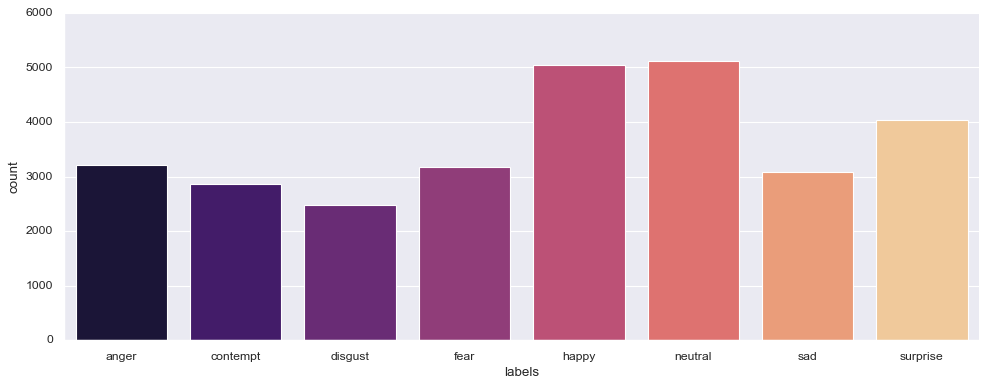

In [4]:
#sea born catplot, x asis are the labels and y axis are the number of images

sns.catplot(x = 'labels', kind = 'count', data = df, palette = 'magma', aspect=2.5)

#print the number of images for each label
df['labels'].value_counts()


In [5]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=124, stratify=df['labels'])
train_df, valid_df = train_test_split(train_df, test_size=0.25, random_state=124, stratify=train_df['labels']) # 0.25 x 0.8 = 0.2
# we are reading 2000 images from each class from the balanced dataframe
# These imagesimages of each class  will be used to train the model 
# we will get the training loss and training accuracy values from these images
file_count = 2000
samples = []
for category in train_df['labels'].unique():    
    category_slice = train_df.query("labels == @category")    
    samples.append(category_slice.sample(min(file_count, len(category_slice)), random_state=12))
df_train= pd.concat(samples, axis=0).sample(frac=1.0, random_state=12).reset_index(drop=True)

print (df_train['labels'].value_counts()) 
print (len(df_train))




labels
neutral     2000
surprise    2000
happy       2000
anger       1930
fear        1906
sad         1855
contempt    1723
disgust     1486
Name: count, dtype: int64
14900


In [6]:
#training dataframe
df_train

,filepaths,labels
0,data/affectNet/fear/image0028257.jpg,fear
1,data/affectNet/anger/image0010585.jpg,anger
2,data/affectNet/contempt/image0025987.jpg,contempt
3,data/affectNet/disgust/image0015876.jpg,disgust
4,data/affectNet/fear/image0038554.jpg,fear
...,...,...
14895,data/affectNet/neutral/ffhq_87.png,neutral
14896,data/affectNet/happy/ffhq_3744.png,happy
14897,data/affectNet/fear/image0029512.jpg,fear
14898,data/affectNet/surprise/image0026054.jpg,surprise


In [7]:
# These 250 images of each class  will be used to validition

file_count = 250
samples = []
for category in valid_df['labels'].unique():    
    category_slice = valid_df.query("labels == @category")    
    samples.append(category_slice.sample(min(file_count, len(category_slice)), random_state=124))
df_valid= pd.concat(samples, axis=0).sample(frac=1.0, random_state=124).reset_index(drop=True)

print (df_valid['labels'].value_counts()) 
print (len(df_valid))

labels
disgust     250
neutral     250
anger       250
surprise    250
happy       250
fear        250
contempt    250
sad         250
Name: count, dtype: int64
2000


In [8]:
# These 250 images of each class  will be used to test the model or unseen dataset

samples = []
for category in test_df['labels'].unique():    
    category_slice = test_df.query("labels == @category")    
    samples.append(category_slice.sample(min(file_count, len(category_slice)), random_state=124))
df_test= pd.concat(samples, axis=0).sample(frac=1.0, random_state=124).reset_index(drop=True)

print (df_test['labels'].value_counts()) 
print (len(df_test))

labels
happy       250
neutral     250
anger       250
surprise    250
disgust     250
contempt    250
fear        250
sad         250
Name: count, dtype: int64
2000


In [9]:
#printing the total number of  train, valid and test images

!echo '.........Training data...........'
print( df_train['labels'].value_counts())
print( 'Total train images' ,df_train['labels'].value_counts().sum())

!echo '.........Valid data..............'
print( df_valid['labels'].value_counts())
print( 'Total valid images' ,df_valid['labels'].value_counts().sum())

!echo '.........Test data...........'
print( df_test['labels'].value_counts())
print( 'Total test images' ,df_test['labels'].value_counts().sum())

sum1= df_train['labels'].value_counts().sum() + df_valid['labels'].value_counts().sum() + df_test['labels'].value_counts().sum()

print('......Total dataset images =  ', sum1,'.....')

/bin/bash: /home/gabriel/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
.........Training data...........
labels
neutral     2000
surprise    2000
happy       2000
anger       1930
fear        1906
sad         1855
contempt    1723
disgust     1486
Name: count, dtype: int64
Total train images 14900
/bin/bash: /home/gabriel/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
.........Valid data..............
labels
disgust     250
neutral     250
anger       250
surprise    250
happy       250
fear        250
contempt    250
sad         250
Name: count, dtype: int64
Total valid images 2000
/bin/bash: /home/gabriel/miniconda3/envs/tf/lib/libtinfo.so.6: no version information available (required by /bin/bash)
.........Test data...........
labels
happy       250
neutral     250
anger       250
surprise    250
disgust     250
contempt    250
fear        250
sad         250
Name: count, dtype: int64
To

In [10]:
#Initilizing the input parameters for the images and batch size
# we are resizing all the images into 224x224 pixels and 3 channels (RGB) will be used
# batch size of 32 images will be transferred at each iteration during training to reduce the computational power
height=224 
width=224
channels=3
batch_size=32 
img_shape=(height, width, channels)
img_size=(height, width)

In [11]:
#Libraries
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [12]:
gen=ImageDataGenerator(rescale= 1/255., rotation_range=15, horizontal_flip=True)      #rescaling the images

In [24]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import tensorflow as tf

print("Numărul de GPU-uri disponibile: ", len(tf.config.experimental.list_physical_devices('GPU')))

def fix_GPU():
    config = ConfigProto()
    config.gpu_options.allow_growth = True
    session = InteractiveSession(config=config)
    physical_devices = tf.config.list_physical_devices('GPU')
    tf.config.set_visible_devices(physical_devices[0], 'GPU')
fix_GPU()

/home/gabriel/miniconda3/envs/tf/lib/python3.8/site-packages/tensorflow/python/client/session.py:1769: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


IndexError: list index out of range

# Training data generator
we are applying the data augmentation function on the training dataframe images

In [14]:
train_gen=gen.flow_from_dataframe(df_train, x_col='filepaths', y_col='labels', target_size=img_size,
                                  class_mode='categorical', batch_size=batch_size, color_mode="rgb") 

Found 14900 validated image filenames belonging to 8 classes.


# valid data generator


In [15]:
valid_gen=gen.flow_from_dataframe(df_valid, x_col='filepaths', y_col='labels', target_size=img_size, 
                                  class_mode='categorical',batch_size=batch_size,color_mode='rgb')

Found 2000 validated image filenames belonging to 8 classes.


#Test data generator

In [16]:
testgen=ImageDataGenerator(rescale= 1/255.) 
test_gen= testgen.flow_from_dataframe(df_test, x_col='filepaths', y_col='labels', target_size=img_size, 
                                  class_mode='categorical',batch_size=batch_size,color_mode='rgb')

Found 2000 validated image filenames belonging to 8 classes.


In [17]:
train_gen.class_indices

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprise': 7}

In [18]:
valid_gen.class_indices

{'anger': 0,
 'contempt': 1,
 'disgust': 2,
 'fear': 3,
 'happy': 4,
 'neutral': 5,
 'sad': 6,
 'surprise': 7}

In [19]:
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import MaxPooling2D, ZeroPadding2D, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import MobileNetV2

#CNN model (pre-trained MobileNetv2)

In [20]:
#building model again on best parameters from keras tuner
def build_model():
  BaseModel = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_shape))
  BaseModel.trainable = False
  
  headModel = BaseModel.output
  headModel = layers.BatchNormalization()(headModel)
  headModel = layers.Flatten()(headModel)
  
  headModel = layers.Dense(128, activation='relu')(headModel)
  headModel = layers.BatchNormalization()(headModel)
  headModel = layers.Dense(128, activation='relu')(headModel)
  headModel = layers.Dropout(0.3)(headModel)
  
  output = layers.Dense(8, activation='softmax')(headModel)
  
  model = keras.models.Model(inputs=BaseModel.input, outputs=output)
  
  optimizer = keras.optimizers.Adam(learning_rate=0.001)
  model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  
  return model

In [21]:
model=build_model()
model.summary()

2023-06-05 17:42:57.833167: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-06-05 17:42:57.833252: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: gabriel
2023-06-05 17:42:57.833258: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: gabriel
2023-06-05 17:42:57.833482: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 530.41.3
2023-06-05 17:42:57.833506: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 530.41.3
2023-06-05 17:42:57.833512: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 530.41.3


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

#Model training

In [22]:
import tensorflow
from datetime import datetime
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#fix_GPU()

Model=model.fit( train_gen, batch_size=batch_size, validation_data=valid_gen,  epochs=50, verbose= 1,
                callbacks=[EarlyStopping(patience=440, monitor='val_loss', mode='min'), 
                                            ModelCheckpoint('best_model.h5', 
                                                            save_best_only=True, 
                                                            save_weights_only=True, 
                                                            monitor='val_accuracy', 
                                                            mode='max')]) #fitting the training gen and validation gen images and using ephocs 100

Epoch 1/50


2023-06-05 17:43:01.135239: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 32/466 [=>............................] - ETA: 7:34 - loss: 2.1208 - accuracy: 0.2578

KeyboardInterrupt: 

#Model evalutaion on test dataset

In [ ]:
model.save('faceclassification123123123123.h5')
valid_gen=gen.flow_from_dataframe(df_valid,  x_col='filepaths', y_col='labels', target_size=img_size, class_mode='categorical',
                                    color_mode='rgb', shuffle=False, batch_size=32)  

In [ ]:
#load the model and calcualting the accuracy of the model on validation dataset
from tensorflow.keras.models import load_model

model = load_model('faceclassification123123123123.h5')


acc=model.evaluate(test_gen,batch_size=32, verbose=1)[1]*100
msg='Model accuracy on valid set: ' + str(acc)
print(msg)

In [ ]:
#calcualting the accuracy of the model on validation dataset

acc=model.evaluate(valid_gen,batch_size=32, verbose=1)[1]*100
msg='Model accuracy on valid set: ' + str(acc)
print(msg)

In [ ]:
def print_info( test_gen, preds, print_code):
    class_dict=test_gen.class_indices
    labels= test_gen.labels
    file_names= test_gen.filenames 
    error_list=[]
    true_class=[]
    pred_class=[]
    prob_list=[]
    new_dict={}
    error_indices=[]
    y_pred=[]
    for key,value in class_dict.items():
        new_dict[value]=key             # dictionary {integer of class number: string of class name}
    # store new_dict as a text fine in the save_dir
    classes=list(new_dict.values())     # list of string of class names
    #dict_as_text=str(new_dict)
    #dict_name= subject + '-' +str(len(classes)) +'.txt'  

    errors=0      
    for i, p in enumerate(preds):
        pred_index=np.argmax(p)        
        true_index=labels[i]  # labels are integer values
        if pred_index != true_index: # a misclassification has occurred
            error_list.append(file_names[i])
            true_class.append(new_dict[true_index])
            pred_class.append(new_dict[pred_index])
            prob_list.append(p[pred_index])
            error_indices.append(true_index)            
            errors=errors + 1
        y_pred.append(pred_index)    
    if print_code !=0:
        if errors>0:
            if print_code>errors:
                r=errors
            else:
                r=print_code           
            msg='{0:^28s}{1:^28s}{2:^28s}{3:^16s}'.format('Filename', 'Predicted Class' , 'True Class', 'Probability')
            print_in_color(msg, (0,255,0),(55,65,80))
            for i in range(r):
                msg='{0:^28s}{1:^28s}{2:^28s}{3:4s}{4:^6.4f}'.format(error_list[i], pred_class[i],true_class[i], ' ', prob_list[i])
                print_in_color(msg, (255,255,255), (55,65,60))
                #print(error_list[i]  , pred_class[i], true_class[i], prob_list[i])               
        else:
            msg='With accuracy of 100 % there are no errors to print'
            print_in_color(msg, (0,255,0),(55,65,80))
    if errors>0:
        plot_bar=[]
        plot_class=[]
        for  key, value in new_dict.items():        
            count=error_indices.count(key) 
            if count!=0:
                plot_bar.append(count) # list containg how many times a class c had an error
                plot_class.append(value)   # stores the class 
        fig=plt.figure()
        fig.set_figheight(len(plot_class)/3)
        fig.set_figwidth(10)
        plt.style.use('fivethirtyeight')
        for i in range(0, len(plot_class)):
            c=plot_class[i]
            x=plot_bar[i]
            plt.barh(c, x, )
            plt.title( ' Errors by Class on Test Set')
    
    if len(classes)<= 30:
        # create a confusion matrix and a test report        
        y_true= np.array(labels)        
        y_pred=np.array(y_pred)        
        cm = confusion_matrix(y_true, y_pred )
        clr = classification_report(y_true, y_pred, target_names=classes)
        length=len(classes)
        if length<8:
            fig_width=8
            fig_height=8
        else:
            fig_width= int(length * .5)
            fig_height= int(length * .5)
        plt.figure(figsize=(fig_width, fig_height))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(length)+.5, classes, rotation= 90)
        plt.yticks(np.arange(length)+.5, classes, rotation=0)
        plt.xlabel("Predicted \nAccuracy = " + str(round(acc,2))+'%')
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        #plt.xlabel('\nAccuracy = 97.54%',fontsize=20)
        plt.show()    
        print("Classification Report:\n----------------------\n", clr)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print_code=0
#pred=model.predict(valid_gen) 
#print_info(valid_gen, pred, print_code)
pred=model.predict(test_gen) 
print_info(test_gen, pred, print_code)

#Predictions or Classification

In [ ]:
img = image.load_img(r'data/affectNet/anger/image0000066.jpg', target_size=(224,224,3))
img = image.img_to_array(img)
img = img/255.

classes = np.array(df['labels'].unique())
proba = model.predict(img.reshape(1,224,224,3))
top_2 = np.argsort(proba[0])[:-4:-1]
for i in range(2):
    print("{}".format(classes[top_2[i]])+" ({:.3})".format(proba[0][top_2[i]]))
plt.imshow(img)